<a href="https://www.kaggle.com/code/abdelrahmanwael1029/drug-classification?scriptVersionId=150343877" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


In [2]:
df = pd.read_csv('/kaggle/input/drug-classification/drug200.csv')
df 

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

<Axes: xlabel='Drug', ylabel='count'>

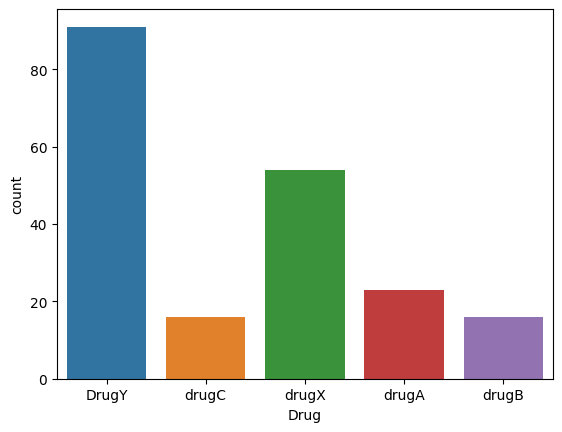

In [7]:
sns.countplot(data=df,x='Drug')

<Axes: xlabel='Sex', ylabel='count'>

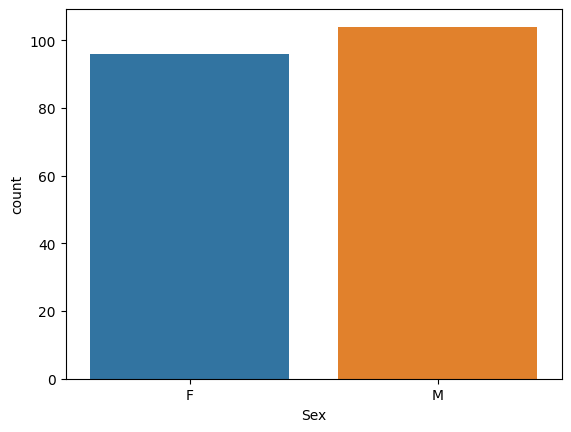

In [8]:
sns.countplot(df, x='Sex')

<Axes: xlabel='Drug', ylabel='count'>

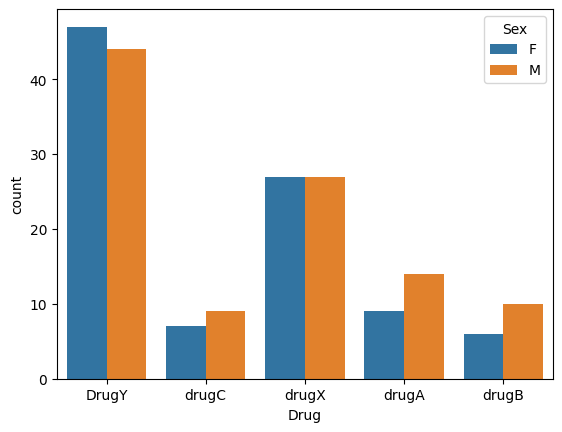

In [9]:
sns.countplot(df, x='Drug', hue = 'Sex')

<Axes: xlabel='Sex', ylabel='Age'>

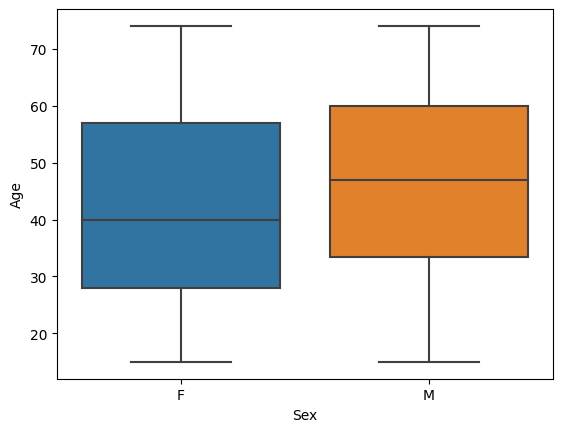

In [10]:
sns.boxplot(df, x='Sex', y='Age')

<Axes: xlabel='Drug', ylabel='Age'>

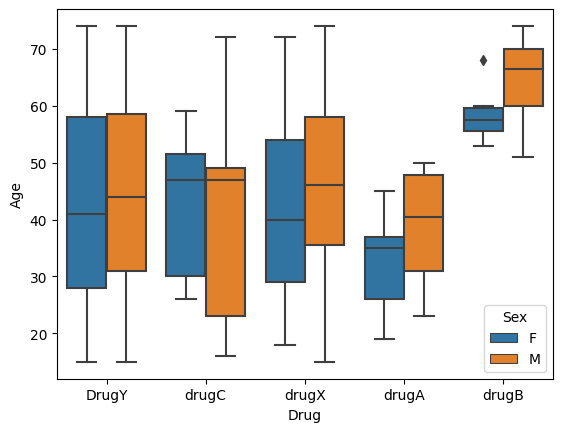

In [11]:
sns.boxplot(df,x='Drug',y='Age', hue='Sex')

<Axes: xlabel='BP', ylabel='count'>

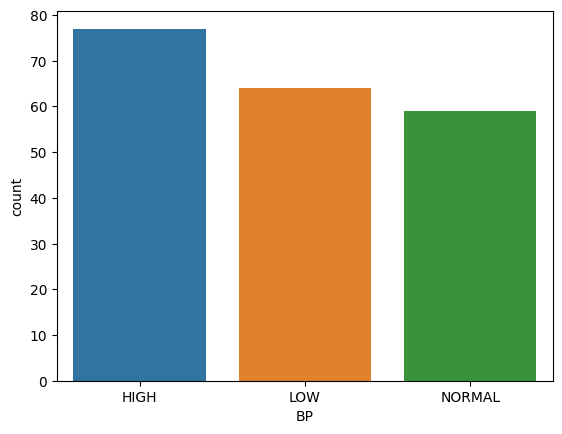

In [12]:
sns.countplot(df,x='BP')

<Axes: xlabel='Drug', ylabel='count'>

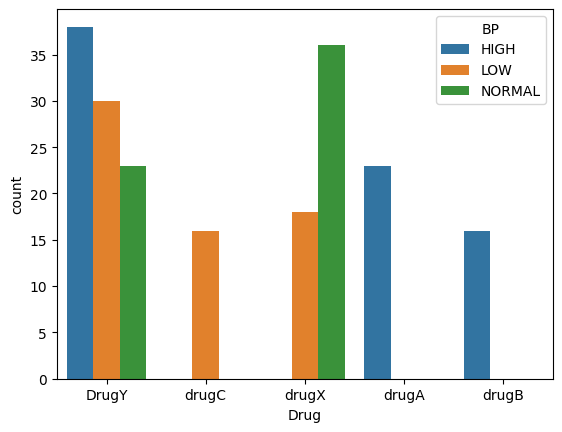

In [13]:
sns.countplot(df, x='Drug', hue = 'BP')

<Axes: xlabel='BP', ylabel='Age'>

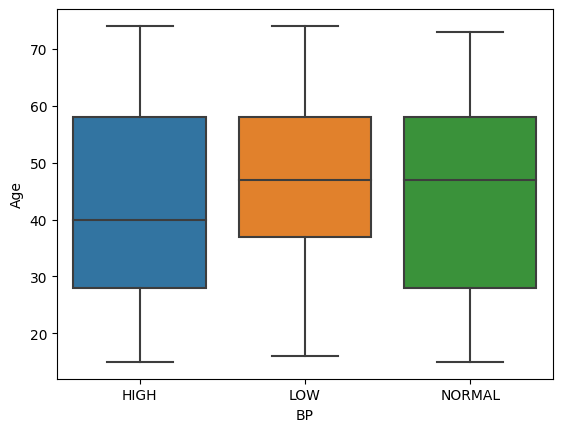

In [14]:
sns.boxplot(df,x='BP', y='Age')

<Axes: xlabel='BP', ylabel='Age'>

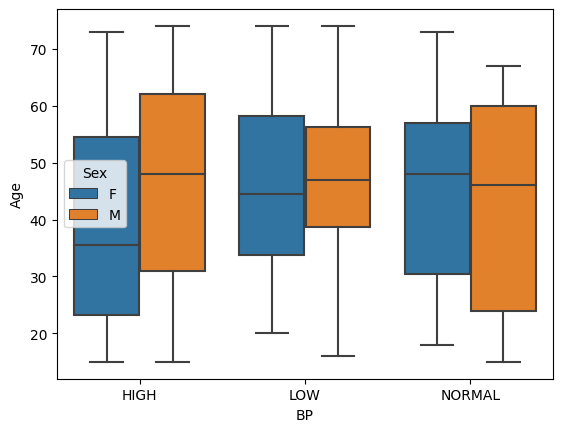

In [15]:
sns.boxplot(df,x='BP', y='Age',hue='Sex')

<Axes: xlabel='Cholesterol', ylabel='count'>

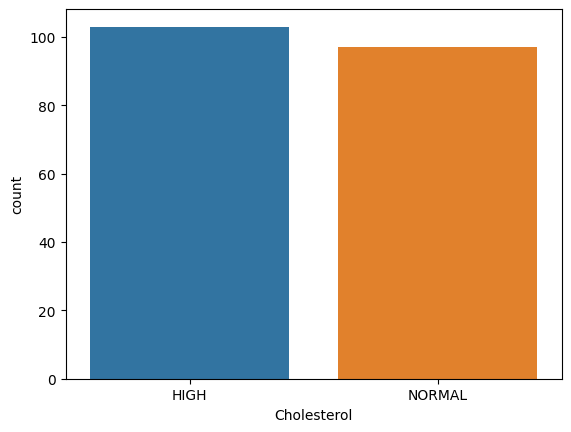

In [16]:
sns.countplot(df, x='Cholesterol')

<Axes: xlabel='Drug', ylabel='count'>

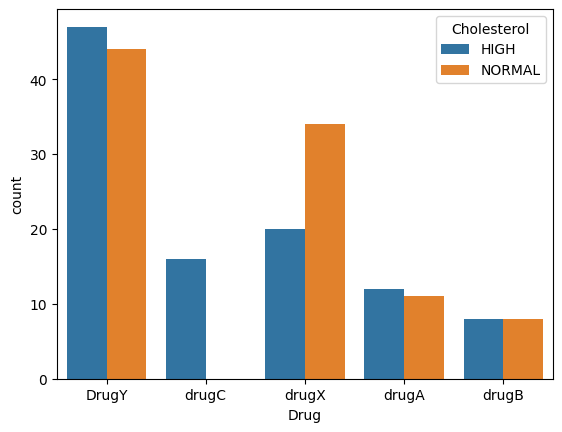

In [17]:
sns.countplot(df,x='Drug', hue='Cholesterol')

<Axes: xlabel='Cholesterol', ylabel='Age'>

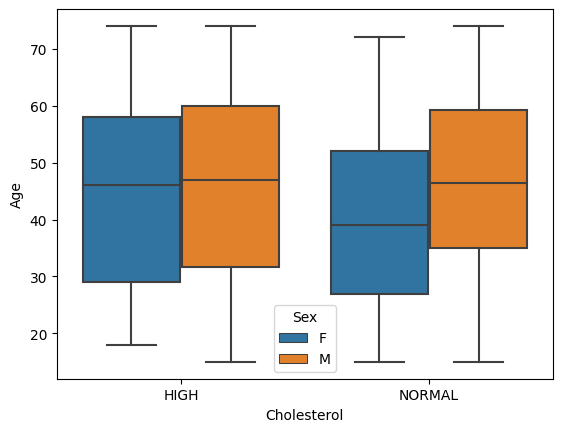

In [18]:
sns.boxplot(df, x='Cholesterol',y='Age', hue='Sex')

<Axes: xlabel='BP', ylabel='count'>

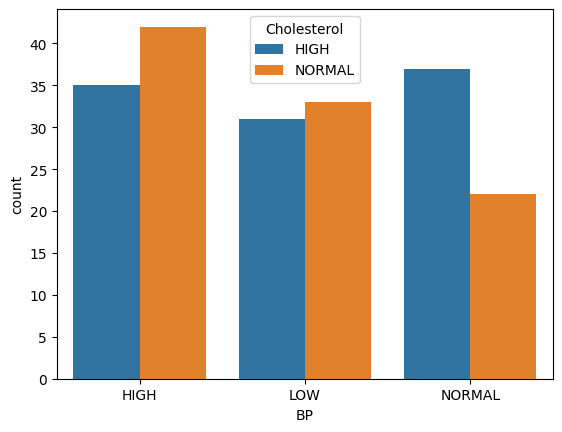

In [19]:
sns.countplot(df,x='BP', hue='Cholesterol')

<Axes: xlabel='Age', ylabel='Na_to_K'>

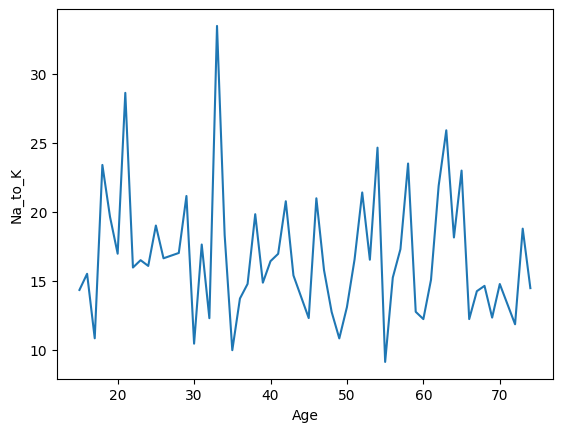

In [20]:
sns.lineplot(df,x='Age', y='Na_to_K', errorbar=None)

<Axes: xlabel='Drug', ylabel='Na_to_K'>

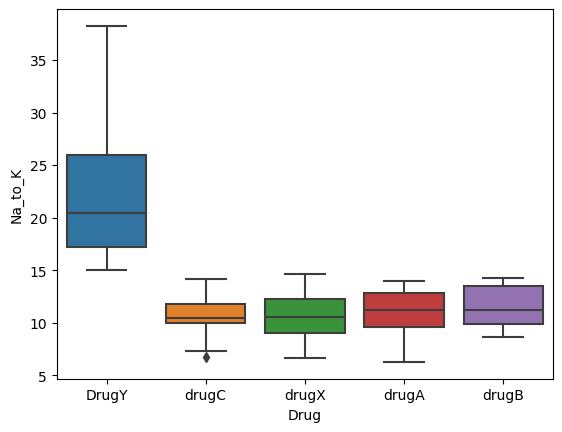

In [21]:
sns.boxplot(df, x='Drug', y='Na_to_K')

<Axes: xlabel='Na_to_K', ylabel='Count'>

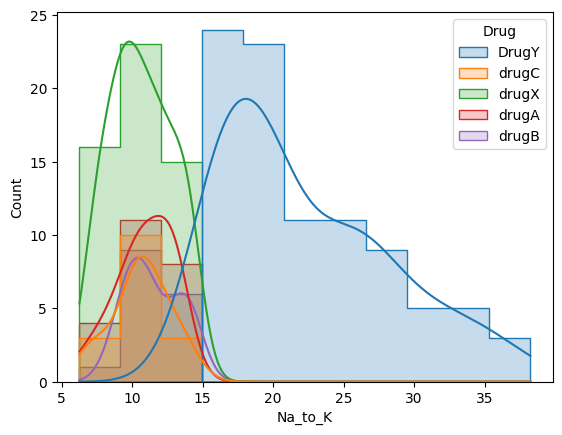

In [22]:
sns.histplot(df,x='Na_to_K', kde='line',hue='Drug',element='step')

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
df.Cholesterol = le.fit_transform(df.Cholesterol)
df.BP = le.fit_transform(df.BP)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [24]:
X = df.drop('Drug', axis = 1)
y = df.Drug
X.shape,y.shape

((200, 5), (200,))

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.2,random_state=23)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 5), (40, 5), (160,), (40,))

## DecisionTreeClassifier

In [26]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

model =DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
def reports(y_test, y_pred):
    report = classification_report(y_test,y_pred, output_dict=True)
    data = pd.DataFrame(report).transpose()
    plt.subplot(121)
    plt.title('classification_report')
    sns.heatmap(data, cmap='Reds',annot=True)
    plt.subplot(122)
    plt.title('confusion_matrix')
    sns.heatmap(confusion_matrix(y_test,y_pred), cmap='Reds', annot=True)
    plt.show()

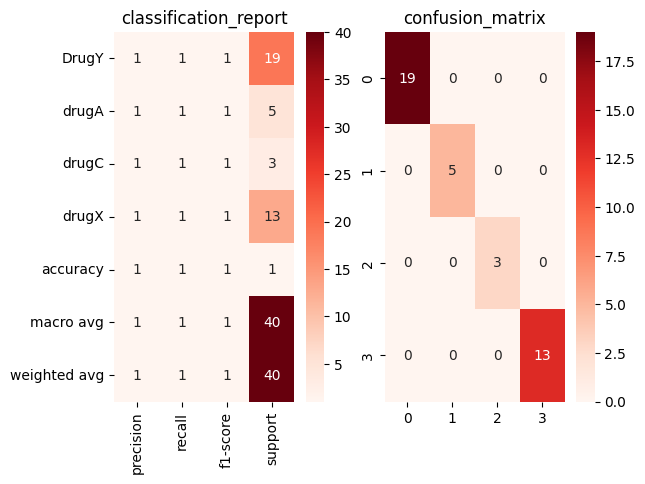

In [28]:
reports(y_test, y_pred)

[Text(0.625, 0.9, 'x[4] <= 14.829\ngini = 0.703\nsamples = 160\nvalue = [72, 18, 16, 13, 41]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.686\nsamples = 88\nvalue = [0, 18, 16, 13, 41]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\ngini = 0.498\nsamples = 34\nvalue = [0, 18, 16, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 18\nvalue = [0, 18, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 16, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\ngini = 0.366\nsamples = 54\nvalue = [0, 0, 0, 13, 41]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\ngini = 0.499\nsamples = 27\nvalue = [0, 0, 0, 13, 14]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 0, 13, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [0, 0, 0, 0, 14]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 0, 0, 27]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 72\nvalue = [72, 0, 0, 0, 0]')]

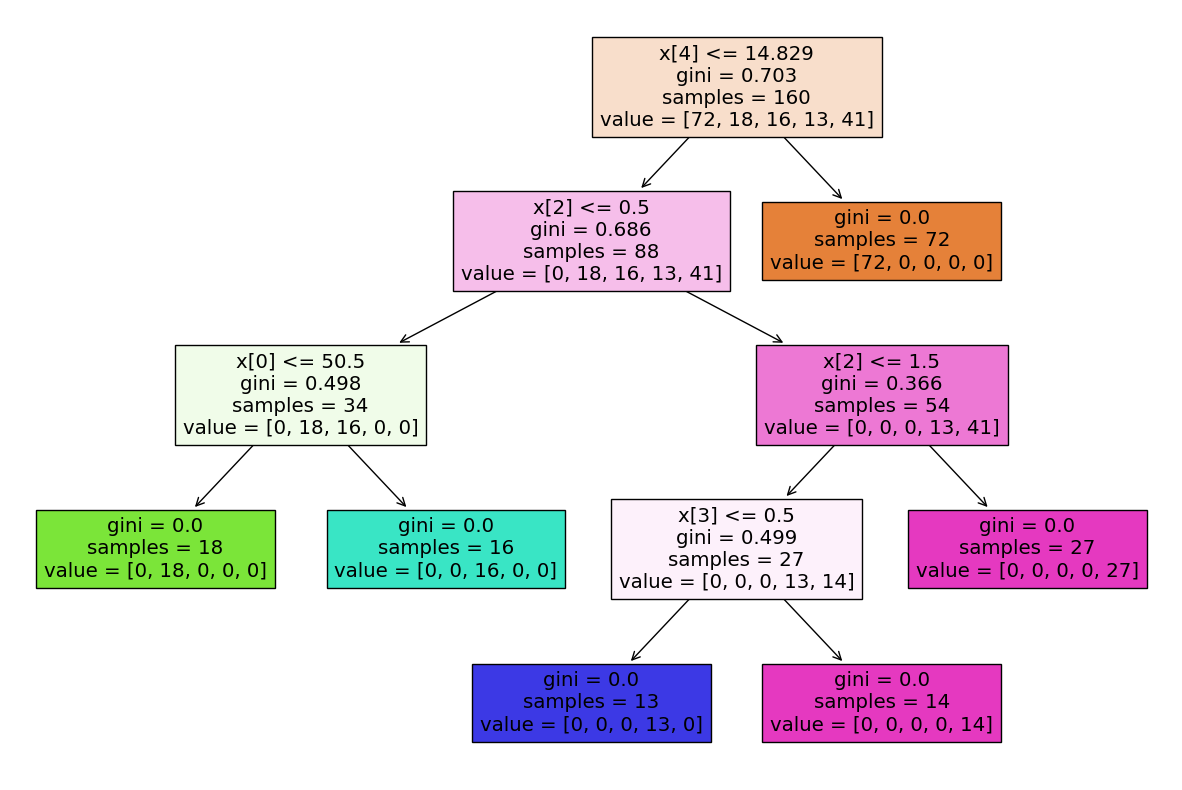

In [29]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [30]:
for i,v in zip(model.feature_names_in_,model.feature_importances_):
 print('Feature: %s, Score: %.5f' % (i,v))

Feature: Age, Score: 0.15071
Feature: Sex, Score: 0.00000
Feature: BP, Score: 0.26655
Feature: Cholesterol, Score: 0.11993
Feature: Na_to_K, Score: 0.46281


## RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
RFC =RandomForestClassifier()
RFC.fit(X_train,y_train)
RFC_y_pred = RFC.predict(X_test)

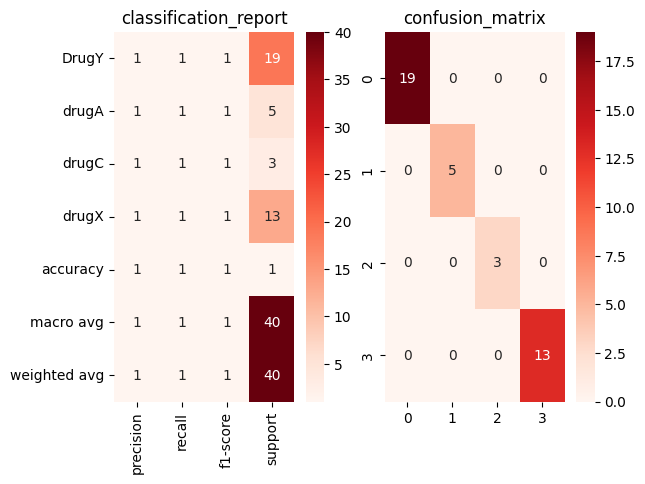

In [32]:
reports(y_test, RFC_y_pred)

In [33]:
for i,v in zip(RFC.feature_names_in_,RFC.feature_importances_):
 print('Feature: %s, Score: %.5f' % (i,v))

Feature: Age, Score: 0.15267
Feature: Sex, Score: 0.01095
Feature: BP, Score: 0.24468
Feature: Cholesterol, Score: 0.05082
Feature: Na_to_K, Score: 0.54087


## svm

In [34]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
svc_y_pred = svc.predict(X_test)


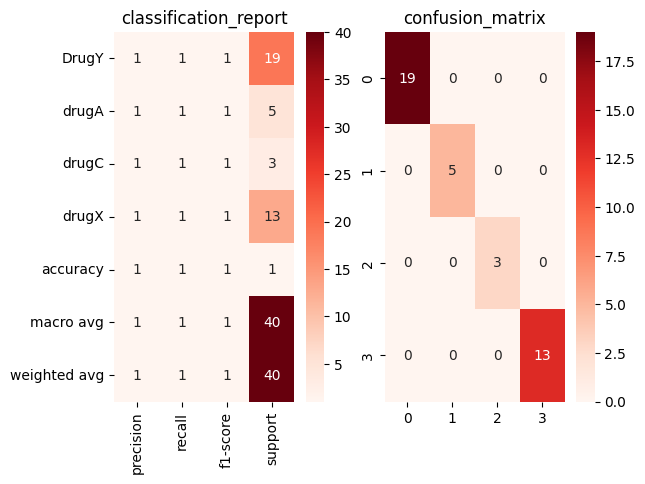

In [35]:
reports(y_test, svc_y_pred)